<a href="https://colab.research.google.com/github/tennisoctocat/zoom-backlighting/blob/master/VisionDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis for Vision Project

Notebook used for the data analysis part of my Computer Vision CS 153 project. 

Author: Cynthia Hom

Date: December 10, 2021

## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import files

Read in the CSV

In [3]:
uploaded = files.upload()
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving VisionSurveyResponses - Form Responses 1.csv to VisionSurveyResponses - Form Responses 1.csv
User uploaded file "VisionSurveyResponses - Form Responses 1.csv" with length 443 bytes


In [4]:
df = pd.read_csv("VisionSurveyResponses - Form Responses 1.csv")

In [5]:
df

,Timestamp,Group 1,Group 2,Group 3,Group 4,Group 5,Comments?
0,12/6/2021 17:32:50,1234,1324,3421,1243,3142,NaN
1,12/6/2021 18:06:31,1234,4321,3124,4213,2413,NaN
2,12/6/2021 18:10:07,4231,1324,4132,1423,2413,You look great!
3,12/6/2021 18:35:31,1234,4321,2134,4312,3142,NaN
4,12/6/2021 18:40:57,1234,4231,3124,4312,2314,NaN
5,12/6/2021 18:50:33,1234,4231,3124,4213,2413,NaN
6,12/6/2021 19:28:08,4321,1324,1432,4123,4213,NaN
7,12/6/2021 21:01:49,1234,4231,4123,4312,2413,NaN


## Data Processing

`permutation` is the permutation of the images in the google form. The order was randomized so that the order of the photos would not influence people's responses.

In [ ]:
permutation = [["raw", "my output", "zoom auto", "zoom manual"],
               ["zoom manual", "my output", "zoom auto", "raw"],
               ["my output", "raw", "zoom auto",  "zoom manual"],
               ["zoom manual", "my output", "raw", "zoom auto"],
               ["zoom auto", "zoom manual", "raw", "my output"]]

We define a function the extract the values we want from the strings that were inputted in the form. We store these in a dictionary with keys that correspond to the brightness value and the type of processing done to the photo.

In [ ]:
def getValueDict(df, groupNum, permutation):
  permutationList = permutation[groupNum - 1]
  colName = f"Group {groupNum}"
  arr = np.array(df[colName])
  valueDict = {}
  valueDict[permutationList[0]] = (arr % 10000) // 1000 # First digit
  valueDict[permutationList[1]] = (arr % 1000) // 100 # second digit
  valueDict[permutationList[2]] = (arr % 100) // 10 # third digit
  valueDict[permutationList[3]] = arr % 10 // 1 # fourth digit
  return valueDict

In [ ]:
myDict = {}
for brightnessVal in range(1, 6, 1): # groups 1 to 5
  myDict[brightnessVal] = getValueDict(df, brightnessVal, permutation)
myDict

{1: {'my output': array([2, 2, 2, 2, 2, 2, 3, 2]),
  'raw': array([1, 1, 4, 1, 1, 1, 4, 1]),
  'zoom auto': array([3, 3, 3, 3, 3, 3, 2, 3]),
  'zoom manual': array([4, 4, 1, 4, 4, 4, 1, 4])},
 2: {'my output': array([3, 3, 3, 3, 2, 2, 3, 2]),
  'raw': array([4, 1, 4, 1, 1, 1, 4, 1]),
  'zoom auto': array([2, 2, 2, 2, 3, 3, 2, 3]),
  'zoom manual': array([1, 4, 1, 4, 4, 4, 1, 4])},
 3: {'my output': array([3, 3, 4, 2, 3, 3, 1, 4]),
  'raw': array([4, 1, 1, 1, 1, 1, 4, 1]),
  'zoom auto': array([2, 2, 3, 3, 2, 2, 3, 2]),
  'zoom manual': array([1, 4, 2, 4, 4, 4, 2, 3])},
 4: {'my output': array([2, 2, 4, 3, 3, 2, 1, 3]),
  'raw': array([4, 1, 2, 1, 1, 1, 2, 1]),
  'zoom auto': array([3, 3, 3, 2, 2, 3, 3, 2]),
  'zoom manual': array([1, 4, 1, 4, 4, 4, 4, 4])},
 5: {'my output': array([2, 3, 3, 2, 4, 3, 3, 3]),
  'raw': array([4, 1, 1, 4, 1, 1, 1, 1]),
  'zoom auto': array([3, 2, 2, 3, 2, 2, 4, 2]),
  'zoom manual': array([1, 4, 4, 1, 3, 4, 2, 4])}}

Let's turn this into a dataframe so that we can graph things properly.

In [ ]:
listsToAdd = []
for brightnessVal in myDict:
  for imgType in myDict[brightnessVal]:
    myArr = np.array(myDict[brightnessVal][imgType], dtype="int")
    brightnessCol = np.array([brightnessVal] * len(myArr))
    outputTypeCol = np.array([imgType] * len(myArr))
    toAdd = np.stack((brightnessCol, outputTypeCol, myArr), axis=1)
    listsToAdd.append(toAdd)
listForDf = np.concatenate(listsToAdd)

In [ ]:
newDf = pd.DataFrame(listForDf, columns=["brightness", "type", "rating"])

Let's take a look at our dataframe.

In [ ]:
newDf.head()

,brightness,type,rating
0,1,raw,1
1,1,raw,1
2,1,raw,4
3,1,raw,1
4,1,raw,1


In [ ]:
type(newDf['rating'][0])

In [ ]:
type(newDf['brightness'][0])

str

We notice that the rating and brightness columns do not have type int, so let's make them type int. 

In [ ]:
newDf['rating'] = newDf['rating'].astype('uint8')
newDf['brightness'] = newDf['brightness'].astype('uint8')
print(type(newDf['rating'][0]))
print(type(newDf['brightness'][0]))

<class 'numpy.uint8'>
<class 'numpy.uint8'>


## Graphs

We want to compare the overall average relative ranking for all types, as well as across brightnesses.

I used this [tutorial](https://www.marsja.se/how-to-save-a-seaborn-plot-as-a-file-e-g-png-pdf-eps-tiff/) to figure out how to save the images with different formats. 

Let's start by showing the average relative ranking for each of the different processing types.

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

Let's show the overall scores with confidence intervals for all the data, across all the input types. From the [documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html), we can tell that these are 95% confidence intervals, which is perfect for what we want.

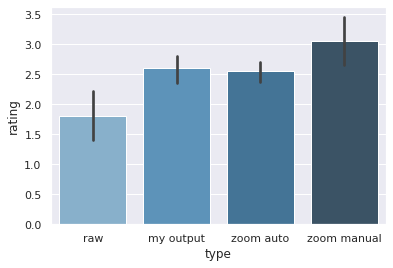

In [ ]:
ax = sns.barplot(x="type", y="rating", data=newDf, palette="Blues_d")
plt.savefig('bar_graph.svg')
plt.savefig('bar_graph.png', dpi=300)

Or perhaps we can make this a point plot instead. Here's the [documentation](https://seaborn.pydata.org/generated/seaborn.pointplot.html) for the point plot.

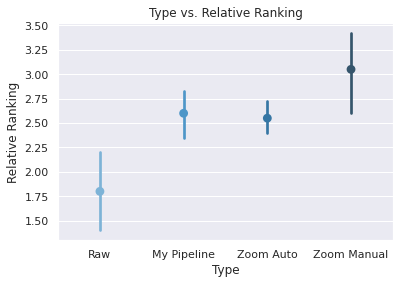

In [ ]:
ax = sns.pointplot(x="type", y="rating", data=newDf, join=False, palette="Blues_d")
ax.set_title("Type vs. Relative Ranking")
ax.set_xlabel("Type")
ax.set_ylabel("Relative Ranking")
ax.set_xticklabels(["Raw", "My Pipeline", "Zoom Auto", "Zoom Manual"])
plt.savefig('TypeVsRelativeRankingOverall.svg')
plt.savefig('TypeVsRelativeRankingOverall.png', dpi=300)

Now let's make a separate plot that shows the distribution of scores across different brightness values for my output only. 

In [ ]:
myOutputDf = newDf[newDf['type'] == "my output"]

In [ ]:
myOutputDf.head()

,brightness,type,rating
8,1,my output,2
9,1,my output,2
10,1,my output,2
11,1,my output,2
12,1,my output,2


In [ ]:
myOutputDf.tail()

,brightness,type,rating
155,5,my output,2
156,5,my output,4
157,5,my output,3
158,5,my output,3
159,5,my output,3


Again, confidence interval is 95% confidence interval. Note that the confidence intervals are much larger here because we only have 9 data points for each mean shown on the graph. 

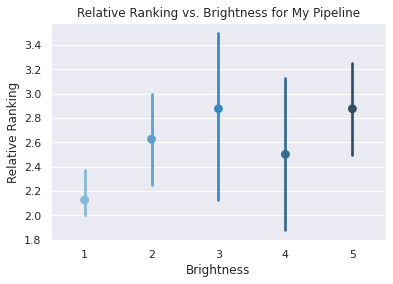

In [ ]:
ax = sns.pointplot(x="brightness", y="rating", data=myOutputDf, join=False, palette="Blues_d")
ax.set_title("Relative Ranking vs. Brightness for My Pipeline")
ax.set_xlabel("Brightness")
ax.set_ylabel("Relative Ranking")
plt.savefig('RelativeRankingVsBrightnessMyPipeline.svg')
plt.savefig('RelativeRankingVsBrightnessMyPipeline.png', dpi=300)

Let's also generate a similar graph to before but for each brightness, so we can compare how the methods do depending on the brightness of the photo.

In [ ]:
def makePointPlot(brightnessLevel):
  brightnessDf = newDf[newDf['brightness'] == brightnessLevel]
  ax = sns.pointplot(x="type", y="rating", data=brightnessDf, join=False, palette="Blues_d", order=["raw", "my output", "zoom auto", "zoom manual"])
  ax.set_title(f"Type vs. Relative Ranking for Brightness {brightnessLevel}")
  ax.set_xlabel("Type")
  ax.set_ylabel("Relative Ranking")
  ax.set_xticklabels(["Raw", "My Pipeline", "Zoom Auto", "Zoom Manual"])
  plt.savefig(f'TypeVsRelativeRankingBrightness{brightnessLevel}.svg')
  plt.savefig(f'TypeVsRelativeRankingBrightness{brightnessLevel}.png', dpi=300)

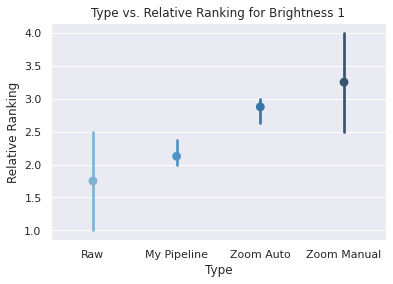

In [ ]:
makePointPlot(1)

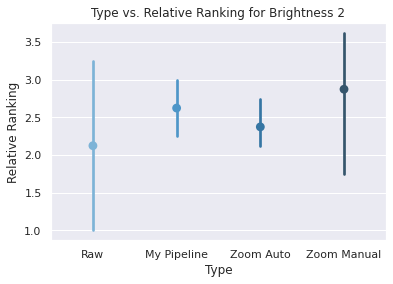

In [ ]:
makePointPlot(2)

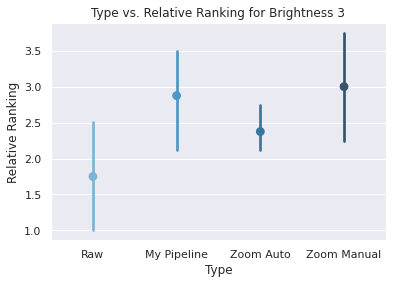

In [ ]:
makePointPlot(3)

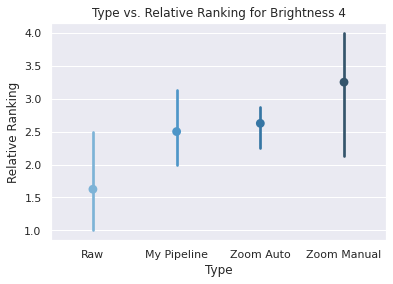

In [ ]:
makePointPlot(4)

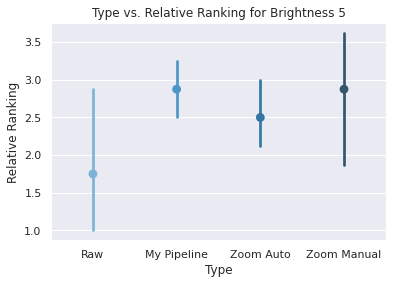

In [ ]:
makePointPlot(5)

It seems that as the brightness increases, the advantage of Zoom Manual, which tends to do the best overall, decreases since it starts to lighten the image more than it needs to.

## Download Files

Used this [Stack Overflow Post](https://stackoverflow.com/questions/50453428/how-do-i-download-multiple-files-or-an-entire-folder-from-google-colab) to figure out how to download files programmatically.

Png files

In [ ]:
!zip -r /content/pngs.zip /content/*.png

  adding: content/bar_graph.png (deflated 23%)
  adding: content/RelativeRankingVsBrightnessMyPipeline.png (deflated 17%)
  adding: content/RelativeRatingVsBrightnessMyPipeline.png (deflated 18%)
  adding: content/TypeVsRelativeRankingBrightness1.png (deflated 16%)
  adding: content/TypeVsRelativeRankingBrightness2.png (deflated 17%)
  adding: content/TypeVsRelativeRankingBrightness3.png (deflated 17%)
  adding: content/TypeVsRelativeRankingBrightness4.png (deflated 16%)
  adding: content/TypeVsRelativeRankingBrightness5.png (deflated 17%)
  adding: content/TypeVsRelativeRankingOverall.png (deflated 17%)
  adding: content/TypeVsRelativeRatingBrightness1.png (deflated 18%)
  adding: content/TypeVsRelativeRatingBrightness2.png (deflated 18%)
  adding: content/TypeVsRelativeRatingBrightness3.png (deflated 18%)
  adding: content/TypeVsRelativeRatingBrightness4.png (deflated 18%)
  adding: content/TypeVsRelativeRatingBrightness5.png (deflated 18%)
  adding: content/TypeVsRelativeRatingOvera

In [ ]:
files.download("/content/pngs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Svg files.

In [ ]:
!zip -r /content/img_svgs.zip /content/*.svg

  adding: content/bar_graph.svg (deflated 78%)
  adding: content/RelativeRankingVsBrightnessMyPipeline.svg (deflated 79%)
  adding: content/RelativeRatingVsBrightnessMyPipeline.svg (deflated 78%)
  adding: content/TypeVsRelativeRankingBrightness1.svg (deflated 78%)
  adding: content/TypeVsRelativeRankingBrightness2.svg (deflated 78%)
  adding: content/TypeVsRelativeRankingBrightness3.svg (deflated 78%)
  adding: content/TypeVsRelativeRankingBrightness4.svg (deflated 78%)
  adding: content/TypeVsRelativeRankingBrightness5.svg (deflated 78%)
  adding: content/TypeVsRelativeRankingOverall.svg (deflated 78%)
  adding: content/TypeVsRelativeRatingBrightness1.svg (deflated 78%)
  adding: content/TypeVsRelativeRatingBrightness2.svg (deflated 77%)
  adding: content/TypeVsRelativeRatingBrightness3.svg (deflated 78%)
  adding: content/TypeVsRelativeRatingBrightness4.svg (deflated 78%)
  adding: content/TypeVsRelativeRatingBrightness5.svg (deflated 78%)
  adding: content/TypeVsRelativeRatingOvera

In [ ]:
files.download("/content/img_svgs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>